In [ ]:
🟦 CELL 1 — Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


In [ ]:
🟦 CELL 2 — Load the Dataset

In [38]:
df = pd.read_csv("./TN_Election_Consolidated_2001_2021.csv")

df.head(60)

,year,constituency,district,total_voters,votes_polled,turnout_pct,winning_party,winning_vote_pct,runnerup_vote_pct,margin_pct
0,2021,Vaniyambadi,Tirupathur,238510,183421,76.90,AIADMK,46.69,44.09,2.60
1,2021,Vanur,Villupuram,226539,180845,79.83,AIADMK,50.99,38.98,12.01
2,2021,Vasudevanallur,Tenkasi,222117,173710,78.21,DMK,39.60,38.20,1.40
3,2021,Vedaranyam,Nagapattinam,184292,157387,85.40,AIADMK,50.00,42.20,7.80
4,2021,Veerapandi,Salem,222474,191772,86.20,AIADMK,50.20,41.30,8.90
5,2021,Velachery,Chennai,314537,174972,55.63,INC,39.15,36.66,2.49
6,2021,Vellore,Vellore,254345,174136,68.46,DMK,46.10,41.29,4.81
7,2021,Vilathikulam,Thoothukudi,209256,166133,79.39,DMK,54.40,31.20,23.20
8,2021,Villivakkam,Chennai,258901,145321,56.13,DMK,52.40,31.20,21.20
9,2021,Villupuram,Villupuram,262068,203890,77.80,DMK,50.16,42.87,7.29


In [ ]:
🟦 CELL 3 — Basic Data Check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               64 non-null     int64  
 1   constituency       64 non-null     object 
 2   district           64 non-null     object 
 3   total_voters       64 non-null     int64  
 4   votes_polled       64 non-null     int64  
 5   turnout_pct        64 non-null     float64
 6   winning_party      64 non-null     object 
 7   winning_vote_pct   64 non-null     float64
 8   runnerup_vote_pct  64 non-null     float64
 9   margin_pct         64 non-null     float64
dtypes: float64(4), int64(3), object(3)
memory usage: 5.1+ KB


In [7]:
🟦 CELL 4 Feature Engineering (MOST IMPORTANT PART)


SyntaxError: invalid character '🟦' (U+1F7E6) (3287600452.py, line 1)

In [20]:
# Feature Engineering (MOST IMPORTANT PART)
# Votes not taken by top 2 parties

df["vote_transfer_potential"] = (
    df["runnerup_vote_pct"] - df["margin_pct"]
)

df["vote_fragmentation"] = 100 - (
    df["winning_vote_pct"] + df["runnerup_vote_pct"]
)

# Swing seat indicator
df["swing_seat"] = (df["margin_pct"] < 5).astype(int)

# Urban indicator (Chennai seats)
df["urban_flag"] = (df["district"] == "Chennai").astype(int)

# ✅ CREATE TARGET COLUMN HERE
df["new_candidate_vote_pct"] = (
    df["vote_fragmentation"] * 0.6
    + df["vote_transfer_potential"] * 0.2
    + df["swing_seat"] * 5
    + df["urban_flag"] * 5
)

df[[
    "constituency",
    "margin_pct",
    "vote_fragmentation",
    "swing_seat",
    "urban_flag"
]].head(14)


,constituency,margin_pct,vote_fragmentation,swing_seat,urban_flag
0,Vaniyambadi,2.60,9.22,1,0
1,Vanur,12.01,10.03,0,0
2,Vasudevanallur,1.40,22.20,1,0
3,Vedaranyam,7.80,7.80,0,0
4,Veerapandi,8.90,8.50,0,0
5,Velachery,2.49,24.19,1,1
6,Vellore,4.81,12.61,1,0
7,Vilathikulam,23.20,14.40,0,0
8,Villivakkam,21.20,16.40,0,1
9,Villupuram,7.29,6.97,0,0


In [21]:
train = df[df["year"] <= 2016]
test  = df[df["year"] == 2021]

features = [
    "turnout_pct",
    "margin_pct",
    "vote_fragmentation",
    "swing_seat",
    "urban_flag"
]

X_train = train[features]
y_train = train["new_candidate_vote_pct"]

X_test = test[features]


In [39]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, n_estimators=300, random_state=42)

In [40]:
test["predicted_vote_pct"] = model.predict(X_test)

test.head()


,year,constituency,district,total_voters,votes_polled,turnout_pct,winning_party,winning_vote_pct,runnerup_vote_pct,margin_pct,vote_fragmentation,swing_seat,urban_flag,new_candidate_vote_pct,vote_transfer_potential,predicted_vote_pct
0,2021,Vaniyambadi,Tirupathur,238510,183421,76.90,AIADMK,46.69,44.09,2.60,9.22,1,0,18.830,41.49,18.948643
1,2021,Vanur,Villupuram,226539,180845,79.83,AIADMK,50.99,38.98,12.01,10.03,0,0,11.412,26.97,12.831011
2,2021,Vasudevanallur,Tenkasi,222117,173710,78.21,DMK,39.60,38.20,1.40,22.20,1,0,25.680,36.80,22.845047
3,2021,Vedaranyam,Nagapattinam,184292,157387,85.40,AIADMK,50.00,42.20,7.80,7.80,0,0,11.560,34.40,11.571023
4,2021,Veerapandi,Salem,222474,191772,86.20,AIADMK,50.20,41.30,8.90,8.50,0,0,11.580,32.40,12.943371


In [41]:
shortlist = test[test["constituency"].isin(
    ["Velachery", "Villivakkam", "Vikravandi", "Vriddhachalam"]
)]

shortlist[[
    "constituency",
    "margin_pct",
    "predicted_vote_pct"
]].sort_values("predicted_vote_pct", ascending=False)


,constituency,margin_pct,predicted_vote_pct
5,Velachery,2.49,24.848154
13,Vriddhachalam,0.44,22.851680
12,Vikravandi,4.94,16.575016
8,Villivakkam,21.20,15.552251


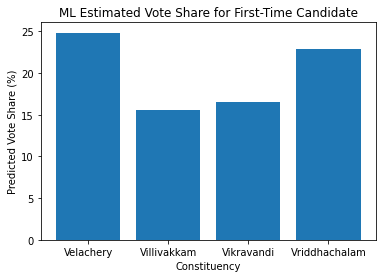

In [42]:
plt.figure()
plt.bar(
    shortlist["constituency"],
    shortlist["predicted_vote_pct"]
)

plt.xlabel("Constituency")
plt.ylabel("Predicted Vote Share (%)")
plt.title("ML Estimated Vote Share for First-Time Candidate")
plt.show()


In [43]:
importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values(ascending=False)

importance


vote_fragmentation    0.619566
margin_pct            0.261184
swing_seat            0.058647
turnout_pct           0.041065
urban_flag            0.019538
dtype: float64

In [44]:
shortlist[[
    "constituency",
    "predicted_vote_pct"
]]


,constituency,predicted_vote_pct
5,Velachery,24.848154
8,Villivakkam,15.552251
12,Vikravandi,16.575016
13,Vriddhachalam,22.851680
